In [48]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df_games = pd.read_csv("post_ETL/df_games.csv")
games_ml = pd.read_csv("post_ETL/df_games_ml.csv")
df_items = pd.read_csv("post_ETL/df_items.csv")
df_reviews_desanidado = pd.read_csv("post_ETL/df_reviews_desanidado.csv")
df_items_desanidado = pd.read_parquet("post_ETL/df_items_desanidado.parquet")

In [103]:
genre_strings = df_games["genres"]
genre_lists = [ast.literal_eval(genre) for genre in genre_strings]
all_genres = [genre for genres_list in genre_lists for genre in genres_list]
unique_genres = list(set(all_genres))

for genre in unique_genres:
    df_games[genre] = df_games["genres"].apply(lambda x: 1 if genre in ast.literal_eval(x) else 0)

columnas = ["genres", "app_name", "developer", "id", "price", "early_access", "release_date"]
df_games = df_games.drop(columns=columnas)

juegos = df_games
juegos.to_csv("post_ETL/df_games_ml.csv", index=False)

,Animation &amp; Modeling,Design &amp; Illustration,Massively Multiplayer,Simulation,Strategy,Early Access,Action,Adventure,Free to Play,Racing,...,Audio Production,Photo Editing,Utilities,RPG,Software Training,Sports,Casual,Video Production,Web Publishing,Education
0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22505,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
22506,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22507,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22508,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


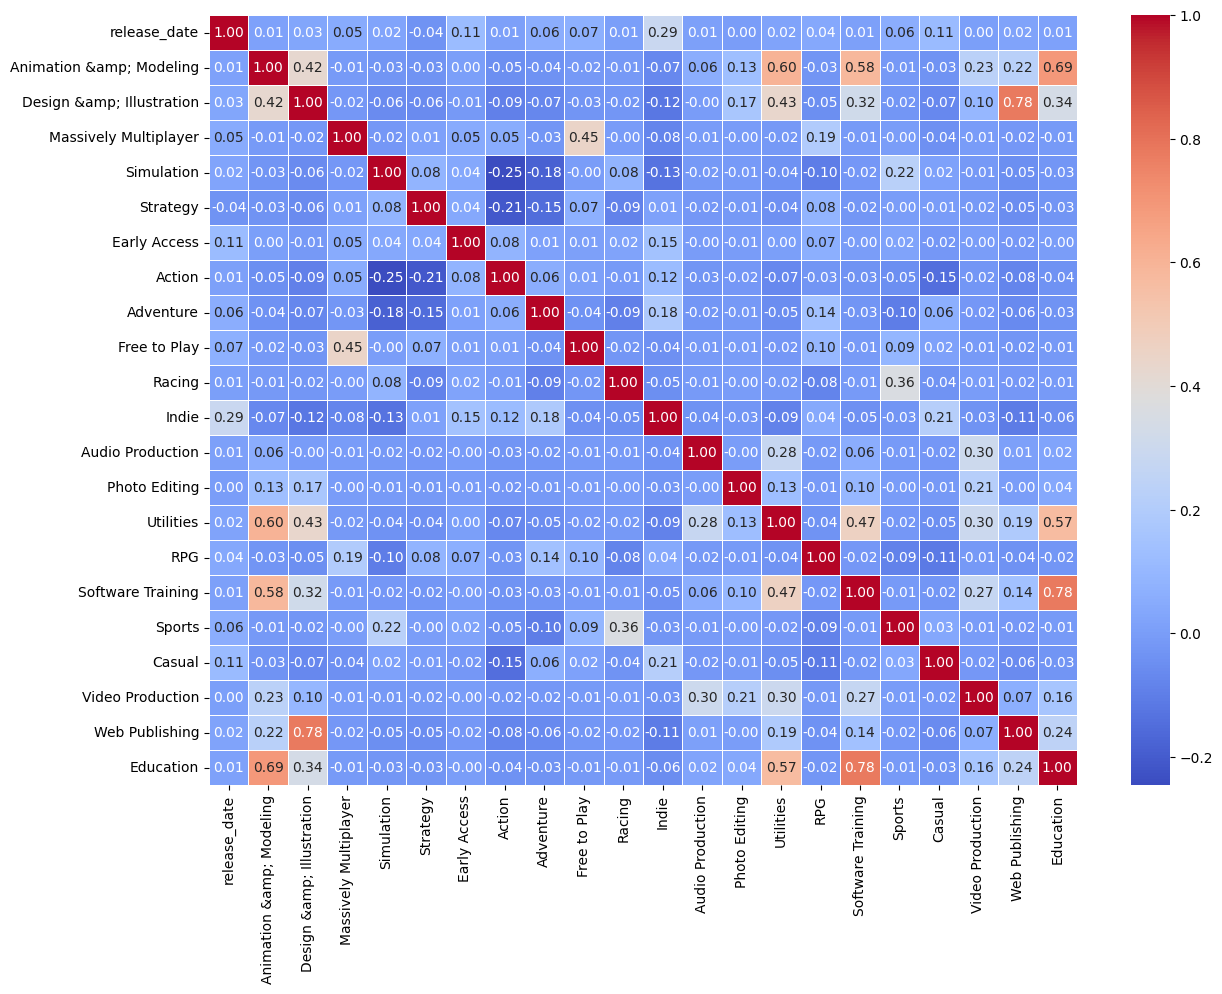

In [37]:
correlation_matrix = df_games.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()